<a href="https://colab.research.google.com/github/fianadew/tensorflow/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import seluruh library yang dibutuhkan
import os
import zipfile,os
import tensorflow as tf
from google.colab import drive

In [ ]:
#koneksikan ke google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#memanggil directory folder kaggle yang berisi API kaggle
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
#fetch data dari kaggle menggunakan API data 
!kaggle datasets download -d andrewmvd/medical-mnist

medical-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip data 
local_zip  ='/content/medical-mnist.zip'
ref_zip = zipfile.ZipFile(local_zip, 'r')
ref_zip.extractall('/medical-mnist')
ref_zip.close()
base_dir = '/medical-mnist/'

In [ ]:
#melihat folder data
os.listdir(base_dir)

['Hand', 'HeadCT', 'BreastMRI', 'ChestCT', 'CXR', 'AbdomenCT']

In [ ]:
#melihat jumlah dataset tiap label
print('Total Hand image :', len(os.listdir('/medical-mnist/Hand')))
print('Total HeadCT image: ', len(os.listdir('/medical-mnist/HeadCT')))
print('Total BreastMRT image:', len(os.listdir('/medical-mnist/BreastMRI')))
print('Total ChestCT image : ', len(os.listdir('/medical-mnist/ChestCT')))
print('Total CXR image : ', len(os.listdir('/medical-mnist/CXR')))
print('Total AbdomenCT image : ', len(os.listdir('/medical-mnist/AbdomenCT')))

Total Hand image : 10000
Total HeadCT image:  10000
Total BreastMRT image: 8954
Total ChestCT image :  10000
Total CXR image :  10000
Total AbdomenCT image :  10000


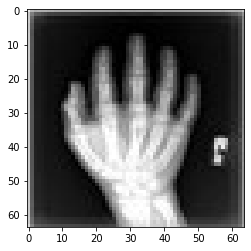

In [ ]:
#melihat contoh gambar yang ada didalam folder
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = image.load_img('/medical-mnist/Hand/000000.jpeg')
plt.imshow(img)

In [ ]:
#melakukan ugmentasi pada gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range =40,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2,
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    horizontal_flip = True,
    fill_mode='nearest',
    validation_split = 0.2,
)
val_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 47164 images belonging to 6 classes.
Found 11790 images belonging to 6 classes.


In [ ]:
#membuat model sequential
import tensorflow as tf
model = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax'),]
)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#membuat callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 1.0 and logs.get('val_accuracy')> 1.0):
      print("\nAkurasi dari model > 92% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch = 10, 
      epochs=10,
      validation_data = val_generator, 
      validation_steps = 4, callbacks=[callbacks],
      verbose = 1)

Epoch 1/10
10/10 [==============================] - 12s 1s/step - loss: 1.4806 - accuracy: 0.4094 - val_loss: 0.9196 - val_accuracy: 0.7031
Epoch 2/10
10/10 [==============================] - 10s 1s/step - loss: 0.7604 - accuracy: 0.7375 - val_loss: 0.5656 - val_accuracy: 0.7109
Epoch 3/10
10/10 [==============================] - 10s 1s/step - loss: 0.4594 - accuracy: 0.7969 - val_loss: 0.3655 - val_accuracy: 0.8359
Epoch 4/10
10/10 [==============================] - 10s 1s/step - loss: 0.2649 - accuracy: 0.8844 - val_loss: 0.2534 - val_accuracy: 0.9141
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 0.1423 - accuracy: 0.9469 - val_loss: 0.1183 - val_accuracy: 0.9609
Epoch 6/10
10/10 [==============================] - 10s 1s/step - loss: 0.2462 - accuracy: 0.9156 - val_loss: 0.6634 - val_accuracy: 0.8359
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 0.3041 - accuracy: 0.9125 - val_loss: 0.1549 - val_accuracy: 0.9531
Epoch 8/10
10/10 [==

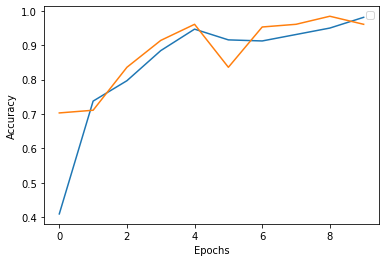

In [ ]:
#membuat plot akurasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc)
plt.plot(val_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

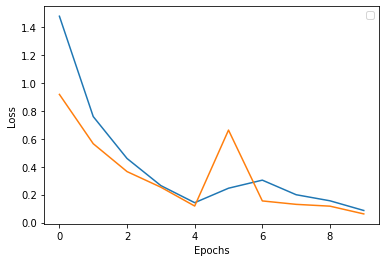

In [ ]:
#membuat plot loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Saving 000067.jpeg to 000067.jpeg
000067.jpeg
Hand


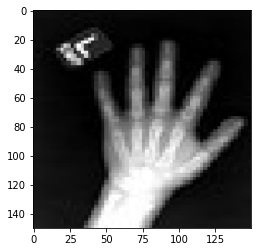

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] == 1:
    print('Abdomen')
  elif classes[0][1] == 1:
    print('Beast NRI')
  elif classes[0][2] == 1:
    print('CXR')
  elif classes[0][3] == 1:
    print('Chest CT')
  elif classes[0][4] == 1:
    print('Hand')
  elif classes[0][5] == 1:
    print('Head CT')
  else:
    print('UNKNOWN')

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp8rh3im_h/assets


INFO:tensorflow:Assets written to: /tmp/tmp8rh3im_h/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)